<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 2

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* [Car figure](https://korkortonline.se/en/theory/reaction-braking-stopping/)
* [Pandas figure](https://yesofcorsa.com/wp-content/uploads/2019/12/Pandas-Reserve-In-China-Wallpaper-1080p.jpeg)

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
        ```
        git reset --hard origin/main
        ```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

In [2]:
# To limit the number of rows to show in a dataframe, for presentation purposes:
import pandas as pd

pd.set_option('display.max_rows', 10)

## Outline for today

* Handling data and handling pandas!
* Introducing a Python framework for data-driven design and analysis of structures and materials: `f3dasm`
* Application of knowledge gained in Lecture 1
* Understanding the governing model for the car stopping distance problem

**Reading material**: This notebook

## The car stopping distance problem (again!)

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="50%" align="right">

Imagine we want to predict $\color{red}y$ for a given ${\color{green}x}$ but that **we had no idea** that this problem is governed by:

${\color{red}y} = {\color{blue}z} x + 0.1 {\color{green}x}^2$

- ${\color{red}y}$ is the **output**: the car stopping distance
- ${\color{green}x}$ is the **input**: the car velocity
- ${\color{blue}z}$ is a hidden variable: an <a title="random variable">rv</a> $z$ representing the driver's reaction time (in seconds)

where $z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$

## The car stopping distance problem

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

Instead, you are just provided with the data $\mathcal{D}$ that contains $N$ measurements of different people stopping the car.

How does the data $\mathcal{D}$ look like?

A table with $N$ rows and 2 columns (input $x=\mathcal{D}_x$ and output $y=\mathcal{D}_y$).

| x (m/s)  | y (m) |
| ----- | ---- |
| 15.5  | 21.4 |
| 5.3   | 11.8 |
| 78.0  | 701.6|
| ...   | ...  |
| 10.8  | 22.1 |

Note that $z$ is nowhere to be found! We could only measure the velocity of the car and the stopping distance, but we could not measure how quickly each driver reacts to seeing the deer!

### `f3dasm`: streamlining your data-driven process!

The **f**ramework for **d**ata-**d**riven **d**esign and **a**nalysis of **s**tructures and **m**aterials (`f3dasm`) aims to generalize this workflow with interfaces (templates of code that you have to fill in)


<center><img src="../figures/f3dasm_carstoppingdistance_line.svg" title="f3dasm Car stopping distance" width="70%"></center>

Today, we will illustrate these modules with the car stopping distance problem:

### Module `design`: Creating our design-of-experiments with the `Domain` class

<img src="../figures/f3dasm_carstopping_design.svg" title="f3dasm Car stopping distance design" width="22%" align="right">

The design-of-experiment aims to describe the variability on the **input** in order to control the **output** of the experiment.

In order to create a design-of-experiment, we import the `Domain` class from the `f3dasm.design` module:

In [158]:
from f3dasm.design import Domain

domain = Domain()
print(domain)

Domain(space={}, output_space={})


Currently the domain is empty; but we can add the car velocity $x$ as an **input parameter**. <br>
Since it is a continuous variable, we use the `add_float` method

Optionally, we can give lower and upper bounds to this variable:

In [159]:
domain.add_float(name='x', low=3.0, high=83.0)
print(domain)

Domain(space={'x': _ContinuousParameter(lower_bound=3.0, upper_bound=83.0, log=False)}, output_space={})


<center><img src="../figures/car_velocity_empty.svg" title="Car stopping distance" width="40%"></center>

* Usually, in ML literature people don't create the data...
    * Data is collected from somewhere (Internet?) and we don't have a clue about the hidden variables involved in the data generation process (unknown causes that explain the data!).

* **But**... In engineering practice this can be different! Sometimes you *can create data* (e.g. from computer simulations, from conducting your own experiments, etc.)
    * Although, models/measurements are never perfect (errors) and can be stochastic (noise)!

Let's create the **input data** for our problem...

In [160]:
N = 33 # number of points to generate data
Data_x = np.linspace(3, 83, N) # generate a dataset with N points for velocities x between 3 and 83 m/s
print("Let's see the Data_x vector:\n", Data_x)

Let's see the Data_x vector:
 [ 3.   5.5  8.  10.5 13.  15.5 18.  20.5 23.  25.5 28.  30.5 33.  35.5
 38.  40.5 43.  45.5 48.  50.5 53.  55.5 58.  60.5 63.  65.5 68.  70.5
 73.  75.5 78.  80.5 83. ]


<center><img src="../figures/car_velocities.svg" title="Car stopping distance" width="40%"></center>

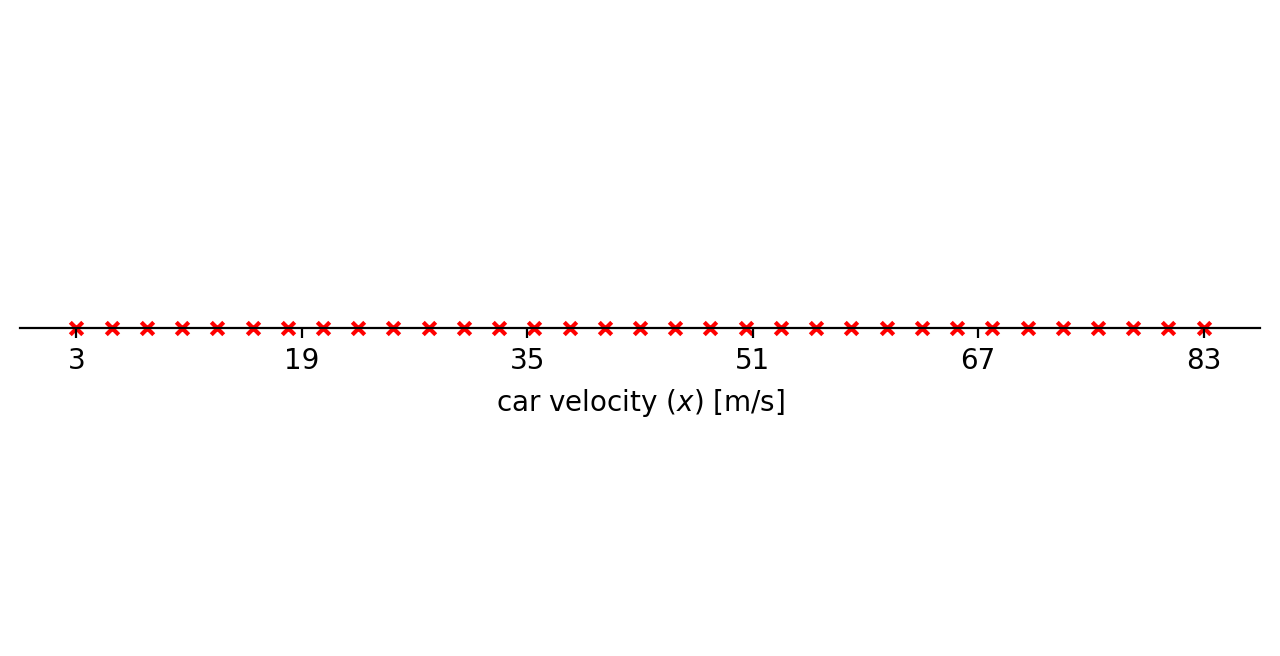

In [207]:
# Optionally: instead of importing a schematic, create the above figure with matplotlib directly:

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.get_yaxis().set_visible(False)
ax.set_xlabel('car velocity ($x$) [m/s]')
ax.set_xticks(np.linspace(3.0, 83.0, 6))

ax.scatter(Data_x, np.zeros(len(Data_x)), s=20, c='red', marker='x' )
plt.show()

We combine both the **domain** and the **input data** in the `f3dasm.ExperimentData` object:

In [238]:
from f3dasm import ExperimentData

In [239]:
experimentdata = ExperimentData(input_data=Data_x, domain=domain)
experimentdata

,jobs,input
,,x
0,open,3.0
1,open,5.5
2,open,8.0
3,open,10.5
4,open,13.0
...,...,...
28,open,73.0
29,open,75.5
30,open,78.0


This object is the central piece of the data-driven process with `f3dasm`!

### Module `datageneration`: Measure the car stopping distance

<!-- <img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right"> -->

<img src="../figures/f3dasm_carstopping_datageneration.svg" title="f3dasm Car stopping distance datageneration" width="22%" align="right">

We can *create* the data from the governing equation.

${\color{red}y} = {\color{blue}z} x + 0.1 {\color{green}x}^2$

- ${\color{red}y}$ is the **output**: the car stopping distance
- ${\color{green}x}$ is the **input**: the car velocity
- ${\color{blue}z}$ is a hidden variable: an <a title="random variable">rv</a> $z$ representing the driver's reaction time (in seconds)

where $z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$

We create the function `compute_distance` with the governing equation:

In [240]:
from scipy.stats import norm # import the normal dist, as we learned before!

# Define our car stopping distance function
def compute_distance(x):
    z = norm.rvs(1.5, 0.5, size=1) # randomly draw 1 sample from the normal dist.
    y = z*x + 0.1*x**2 # compute the stopping distance
    return y

<img src="../figures/car_stoppingdistance.svg" title="Car stopping distance" width="40%" align="right">

We can evaluate our input data points $x$ to retrieve the stopping distance $y$:

In [241]:
experimentdata.evaluate(compute_distance, output_names=['y'])

In [242]:
experimentdata

,jobs,input,output
,,x,y
0,finished,3.0,6.586522
1,finished,5.5,7.990251
2,finished,8.0,18.044006
3,finished,10.5,32.724861
4,finished,13.0,27.839884
...,...,...,...
28,finished,73.0,614.589224
29,finished,75.5,668.61246
30,finished,78.0,750.179875


We can extract the car stopping distance $y$ as a numpy array:

In [243]:
# to_numpy extracts both the input and output data as numpy arrays:
_, Data_y = experimentdata.to_numpy()

Text(0.5, 0, 'car velocity ($x$) [m/s]')

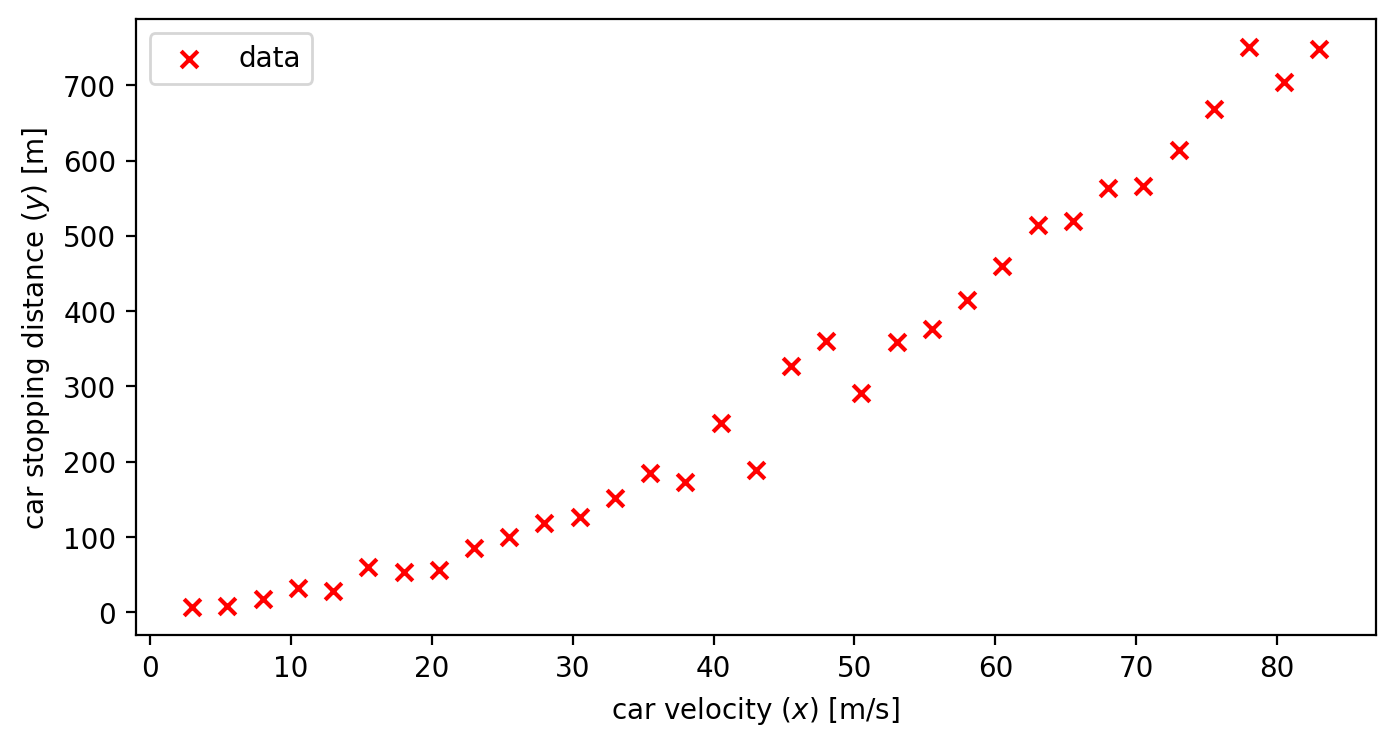

In [246]:
fig, ax = plt.subplots()
ax.scatter(Data_x, Data_y, color='r', marker='x', label='data')
ax.legend()
ax.set_ylabel('car stopping distance ($y$) [m]')
ax.set_xlabel('car velocity ($x$) [m/s]')

### Module `machine learning`: Fit a polynomial model to the data!

<img src="../figures/f3dasm_carstopping_machinelearning.svg" title="f3dasm Car stopping distance machine learning" width="22%" align="right">

In [216]:
from sklearn.preprocessing import PolynomialFeatures # For Polynomial fit
from sklearn.linear_model import LinearRegression # For Least Squares
from sklearn.pipeline import make_pipeline # to link different objects

Creating the polynomial model:

In [247]:
degree = 1
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

Fitting the model with the data:

In [250]:
poly_model.fit(Data_x.reshape(-1, 1), Data_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

Now, instead of using the governing equation (`compute_distance`), we can use the model to predict the car stopping distance:

In [252]:
def compute_distance_with_model(x):
    y_pred = poly_model.predict(np.array(x).reshape(-1, 1)) # We need to reshape the array
    return float(y_pred)

In [253]:
experimentdata.mark_all('open') # Mark all experiments 'open' to evaluate them again
experimentdata.evaluate(compute_distance_with_model, output_names=['y_pred'])

In [254]:
experimentdata

jobs input      output            
                 x           y      y_pred
0   finished   3.0    6.586522  -92.176999
1   finished   5.5    7.990251  -67.693674
2   finished   8.0   18.044006   -43.21035
3   finished  10.5   32.724861  -18.727025
4   finished  13.0   27.839884      5.7563
..       ...   ...         ...         ...
28  finished  73.0  614.589224  593.356097
29  finished  75.5   668.61246  617.839421
30  finished  78.0  750.179875  642.322746
31  finished  80.5  703.880365  666.806071
32  finished  83.0  748.412555  691.289396

[33 rows x 4 columns]

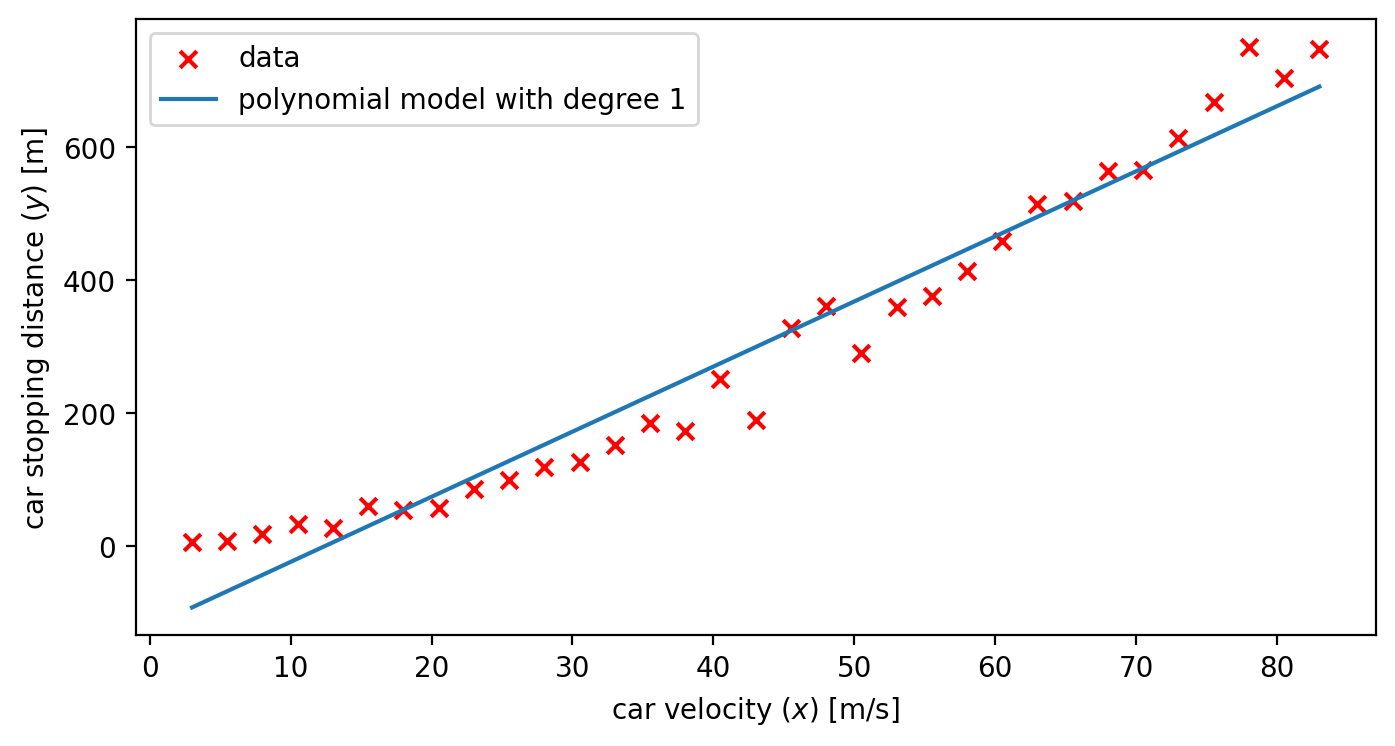

In [256]:
# Converting the ExperimentData object to numpy arrays for plotting
_, out_data = experimentdata.to_numpy()

# Plotting the data and the model prediction
fig, ax = plt.subplots()

ax.scatter(Data_x, Data_y, marker='x', color='red', label='data')
ax.plot(Data_x, out_data[:, 1], label=f'polynomial model with degree {degree}')
ax.legend()
ax.set_ylabel('car stopping distance ($y$) [m]')
ax.set_xlabel('car velocity ($x$) [m/s]')
plt.show()

### Say hello to the pandas!

<img src="../figures/hi_pandas.jpeg" title="Pandas!" width="60%" align="right">

[pandas](https://pandas.pydata.org/docs/index.html) is an open source library that is very common to handle data in ML

Let's create a pandas dataframe $\mathcal{D}$ that includes both the input $\mathcal{D}_x$ and output $\mathcal{D}_y$ that we created.

<img src="../figures/pandas_table_dataframe.svg" title="Pandas DataFrame" width="30%" align="left">



In [231]:
import pandas as pd # Pandas dataframe (very common in ML)
#
# Create a dictionary with the names of the input and output variables
# and their respective values:
input_dictionary = {
            'x' : Data_x.flatten(), # vector with input values of x
            'y' : Data_y.flatten(), # vector with output values of y
            }
#
# Then, we create a Pandas data frame:
car_df = pd.DataFrame(input_dictionary)

print(car_df)

       x           y
0    3.0    8.132784
1    5.5    8.490631
2    8.0   25.519176
3   10.5   25.211323
4   13.0   42.215584
..   ...         ...
28  73.0  653.164124
29  75.5  641.235535
30  78.0  614.798279
31  80.5  738.052368
32  83.0  854.257080

[33 rows x 2 columns]


### Say hello to the pandas!

<img src="../figures/hi_pandas.jpeg" title="Car stopping distance" width="20%" align="right">

The [pandas](https://pandas.pydata.org/docs/index.html) DataFrame we created is quite simple!

Today we won't go through many of the powerful data handling features of pandas.

We will try to introduce things as we need them.

* A basic need: save your data!


In [232]:
# Saving our "car_df" pandas dataframe to the "your_data" folder in our computer is quite simple!
car_df.to_pickle("your_data/car_dataframe.pkl") # done!

Go check in the "your_data" folder if you have created the "car_dataframe.pkl" file!

### Load data from someone else

As mentioned, many ML problems start in a different way:
* We are provided with a dataset in some format.
    * For example, someone else conducted the car stopping distance experiment and saved the measurements in a <a title="comma-separated values">csv</a> file called "**data_for_car_prob.csv**".
    * Then we receive the file and have to use it in our analysis!

We have that file in folder "../data". The "../" just means that folder "data" is one level below the current folder (currently we are on "Lecture2" folder).

* Find the "data" folder and open the "data_for_car_prob.csv" file inside that folder using a text editor!

* Let's learn how to import the data of this <a title="comma-separated values">csv</a> file into a pandas dataframe.

In [233]:
car_csv_data = pd.read_csv("../data/data_for_car_prob.csv") # read csv data provided by someone else
print(car_csv_data)

    Unnamed: 0          x           y
0            0   9.516939   29.749036
1            1  72.398757  642.132203
2            2  17.950326   36.648484
3            3   9.440853   18.604106
4            4  78.791008  769.656168
..         ...        ...         ...
45          45   3.087674    5.947997
46          46  21.254611  101.295276
47          47  46.939484  345.778352
48          48  38.875692  219.095582
49          49  76.705452  742.720134

[50 rows x 3 columns]


We see that one of the columns is redundant!

Let's delete that one

In [234]:
car_prob_df = car_csv_data[['x','y']] # pandas has a fast way to select the
                                      # columns of interest (in this case 'x' and 'y')
print(car_prob_df)

            x           y
0    9.516939   29.749036
1   72.398757  642.132203
2   17.950326   36.648484
3    9.440853   18.604106
4   78.791008  769.656168
..        ...         ...
45   3.087674    5.947997
46  21.254611  101.295276
47  46.939484  345.778352
48  38.875692  219.095582
49  76.705452  742.720134

[50 rows x 2 columns]


This looks better.

In case you are curious, the "data_for_car_prob.csv" was created very similarly to what we did by ourselves.

It used more points (50) and it considered random measurements of $x$ because this mimicks what usually happens in an experiment (each driver will decide his/her own velocity).

Here's the code I used to generate it:

```python
N = 50
x = np.random.uniform(3,83,N)
y = norm.rvs(1.5, 0.5, size=N)*x + 0.1*x**2
data_dic = {
            'x' : x, # vector with input values of x
            'y' : y, # vector with output values of y
            }
data_for_car_prob = pd.DataFrame(data_dic)
data_for_car_prob.to_csv("your_data/data_for_car_prob.csv") # done!
```

In [257]:
Data_x = car_prob_df['x'].values # select the input VALUES from your dataframe into Data_x
Data_y = car_prob_df['y'].values # select the output VALUES from your dataframe inta Data_y
print("Data_x is:\n",Data_x)
print("\nData_y is:\n",Data_y)

Data_x is:
 [ 9.51693942 72.39875748 17.95032583  9.44085299 78.79100778 16.96112056
 65.4103675  58.67109927 21.55060313 36.86691294 15.72874781 58.51149357
 57.41918959 38.45915667  8.84174221 60.73305107 49.25666345 35.89512052
 79.19565172 69.15666925 77.63489641  9.25401128 15.45146824 14.43824684
 13.41099874 53.74705712 10.28371886 82.00547705 81.80556249 51.8377421
 20.28378484 28.35964692 74.99371524 21.82756352 70.51911096 74.20853195
 14.51895792 13.35764354 75.34625316 44.92395642 26.80115926 29.90626522
 40.22635624 66.28266205 47.34277718  3.08767411 21.25461134 46.93948443
 38.87569199 76.70545196]

Data_y is:
 [ 29.74903647 642.13220315  36.64848446  18.60410602 769.65616843
  57.97101034 559.09331318 463.68661322  92.24267632 197.68857288
  56.88523327 388.75379474 399.80748803 213.18151905  20.38738432
 516.34172363 307.93195589 181.12304936 750.17828361 553.15354059
 746.03187971  20.81069833  39.87252654  42.11877078  44.77512244
 375.01393668  19.43886782 742.33684

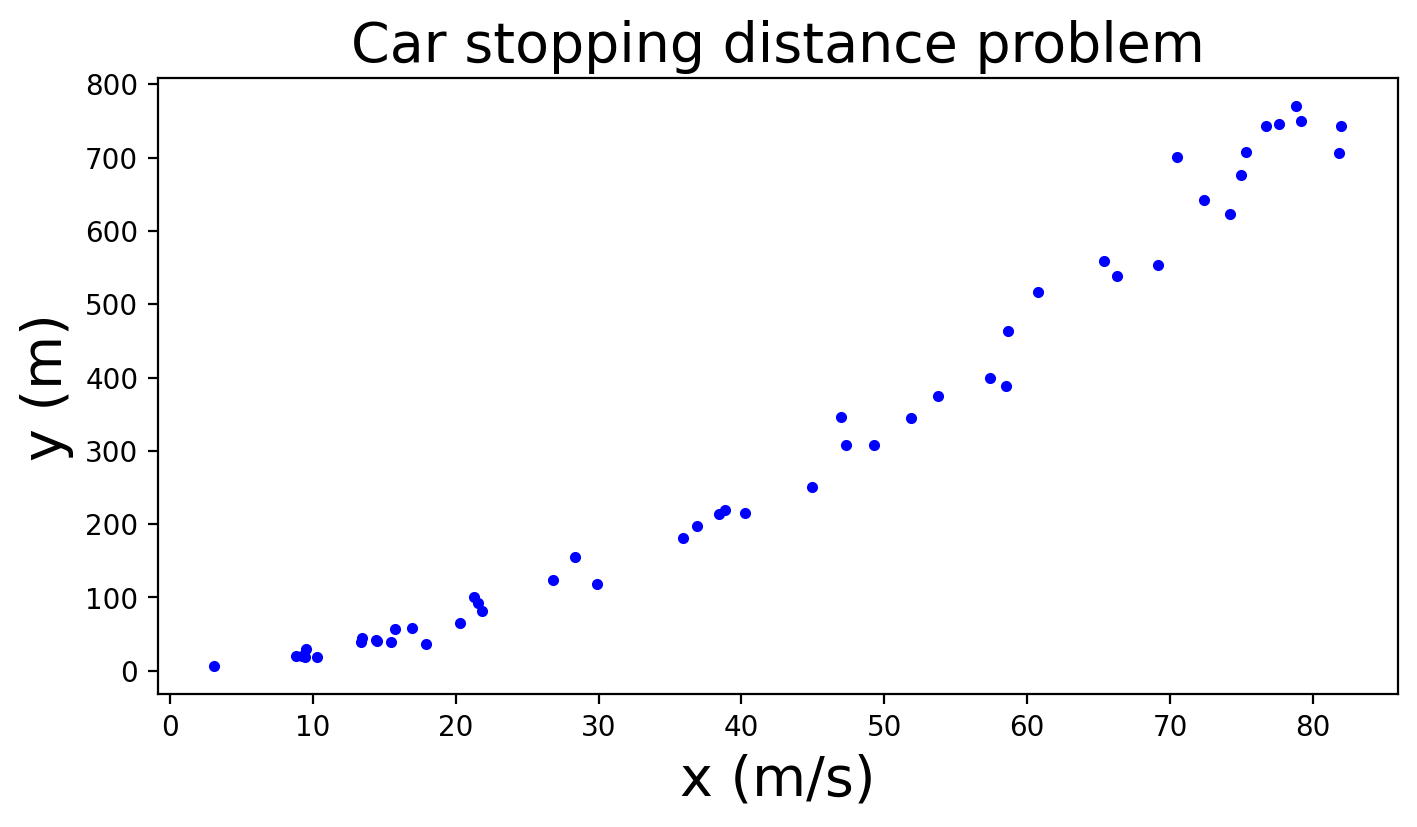

In [258]:
fig_car_data, ax_car_data = plt.subplots() # create a plot
ax_car_data.plot(Data_x, Data_y, 'b.')
ax_car_data.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
ax_car_data.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
ax_car_data.set_title("Car stopping distance problem", fontsize=20); # create title with font size 20

### Creating the `ExperimentData` object from `pandas`

Instead of numpy arrays, we can create the `ExperimentData` object directly from a `pandas` Dataframe:

In [267]:
ExperimentData(
    input_data=car_prob_df['x'].to_frame(), 
    output_data=car_prob_df['y'].to_frame())

,jobs,input,output
,,x,y
0,finished,9.516939,29.749036
1,finished,72.398757,642.132203
2,finished,17.950326,36.648484
3,finished,9.440853,18.604106
4,finished,78.791008,769.656168
...,...,...,...
45,finished,3.087674,5.947997
46,finished,21.254611,101.295276
47,finished,46.939484,345.778352


Notice that we don't need to provide a `domain` object; `f3dasm` will infer the variable names and bounds directly from the DataFrame!

## Saving the `ExperimentData`

The `ExperimentData` object can be saved to your computer is easy with the `store` method:

In [268]:
experimentdata.store('./your_data')

This will create an `experiment_data` folder in the `Lecture1/your_data` directory:

```
your_data/
└── experiment_data/
    ├── domain.pkl
    ├── input.csv
    ├── output.csv
    └── jobs.pkl
```

Importing from a folder is done like this:

In [ ]:
ExperimentData.from_file('./your_data')

### Homework 2 (Exercise 2)
<a id='exercise2_cell'></a>
<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

Our famous car stopping distance problem:

${\color{red}y} = {\color{blue}z} x + 0.1 {\color{green}x}^2$

where $z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$

Derive the expected value and variance for the governing model for the car stopping distance problem:

$\mathbb{E}[y]=?$

$\mathbb{V}[y]=?$



In [ ]:
# Let's plot the model (we pretend for a moment that we know it!)
real_x = np.linspace(3, 83, 1000)
real_mu_y = 1.5*real_x + 0.1*(real_x**2) # Recall: E[z*x+0.1*x^2] = E[z]*E[x]+0.1*E[x^2]
real_sigma_y = np.sqrt( 0.5**2*real_x**2 ) # Recall: V[z*x+x^2] = V[z*x]+V[x^2]=...=sigma_z^2*mu_x^2

ax_car_data.plot(real_x, real_mu_y, 'k:', label="Ground truth")
ax_car_data.fill_between(real_x, real_mu_y - 1.9600 * real_sigma_y,
                real_mu_y + 1.9600 * real_sigma_y,
                color='k', alpha=0.2,
                label='95% confidence interval')
                # See book Sections 4.7.4 and 4.7.5 for a discussion on CI vs credible interval
ax_car_data.legend()
fig_car_data

### Confidence interval vs credible interval

In frequentist statistics, we use the variability induced by the sampling distribution as a way to
estimate uncertainty of a parameter estimate (e.g. mean and standard deviation). More precisely, we define a 100(1 − α)% confidence interval (CI) for a parameter derived from a dataset $\mathcal{D}$.

It is common to set $\alpha = 0.05$, which yields a 95% CI. **This means that, if we repeatedly sample
data, and compute $CI(\mathcal{D})$ for each such dataset, then about 95% of such intervals will contain the true
parameter (e.g. the true mean or the true standard deviation).**

Note, however, that this **DOES NOT** mean that for any particular dataset that the parameter belongs to the CI
with 95% probability! This is what a Bayesian credible interval computes (see book Sections 4.6.6, 4.7.4 and 4.7.5), not what a frequentist confidence interval computes.

Question: If we didn't know the governing model, what should ML do using the data (blue dots)?

## ML (supervised learning regression) goal

1. ML should find the mean response $\mu_y$ from the data $\mathcal{D}=\{\mathcal{D}_x,\mathcal{D}_y\}$ (data: blue dots).

2. Of course we will always make a prediction error (we just see the data, and we don't know the model or complete reality).

3. Ideally, ML should also tell us the confidence we have on the predictions we are making.
    - This is what probabilistic ML does!

4. **However**, even if we don't estimate our confidence (like most ML), having a probabilistic perspective over ML is advantageous because our unknowns can be modeled as <a title="random variables">rv's</a>.
    - This helps us understand where the models come from and that the world is probabilistic.

In the next classes we will understand the simplest ML supervised learning regression models.

This will allow us to make simple predictions, so that later we make some serious predictions!

Here's a teaser for the next lectures about linear regression:

In [ ]:
# This cell will not show up on the presentation.
from sklearn.preprocessing import PolynomialFeatures # For Polynomial fit
from sklearn.linear_model import LinearRegression # For Least Squares
from sklearn.pipeline import make_pipeline # to link different objects

degree = 1 # degree of polynomial we want to fit [you can change this to see what happens!]
poly_model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_model.fit(np.reshape(Data_x, (-1, 1)),Data_y) # fit the polynomial
                                                   # Note: we had to reshape Data_x into 2D array
y_pred = poly_model.predict(np.reshape(Data_x, (-1, 1))) # In scikit-learn, predicting from a model is a one-liner
# Now create linearly spaced points for plotting the polynomial model
x_plot = np.linspace(3, 83, 200) # 200 points uniformly spaced
y_plot = poly_model.predict(np.reshape(x_plot, (-1, 1))) # prediction of those points

fig_poly, ax_poly = plt.subplots() # create a plot
ax_poly.plot(Data_x, Data_y, 'b.', markersize=12,
             label="Data") # Markers locating data points)
ax_poly.plot(Data_x, y_pred, 'm*', markersize=12,
             label="Predictions") # Markers locating prediction points)
legend_str = "Linear regression with Polynomial of degree " + str(degree)
ax_poly.plot(x_plot, y_plot, 'm-', linewidth=2,
         label=legend_str) # polynomial interpolation
                                              # plotted
ax_poly.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
ax_poly.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
ax_poly.set_title("Car stopping distance problem", fontsize=20) # create title with font size 20

ax_poly.legend(loc='upper left') # replot legend
plt.close(fig_poly) # do not plot the figure now. We will show it in a later cell

In [ ]:
# Code to generate this figure is hidden during presentation (it's shown as notes).
# (We will learn how to do this later...)
fig_poly # show figure

### See you next class

Have fun!